In [1]:
using Pkg
using Plots

Pkg.DEFAULT_IO[] = stdout
Pkg.activate("..")
include("../Grid/Staggered.jl")
include("../Grid/Periodic_avg.jl")
include("../Staggered/Advection/Periodic_1D.jl")

  Activating environment at `~/Desktop/PhD/Codes/julia_package/ToyModel.jl/Project.toml`


adv_x_Euler! (generic function with 1 method)

In [2]:
g = 9.81

Lx = 6
nx = 100
grid = Grid(nx, -Lx/2, Lx/2);

In [3]:
function flow!(flow_sign, U_old, grid)
    nx = grid.nx
    for i in 1:nx
        if(U_old[i] != 0.0)
            flow_sign[i] = U_old[i]/abs(U_old[i])
        else
            flow_sign[i] = 0.0
        end
    end
end

flow! (generic function with 1 method)

In [4]:
#Initialising variables
xt = grid.xt
xu = grid.xu
dx = grid.dx

#Tracer and momentum variables
h_old = zeros(nx)
@. h_old = 1 + 0.01*exp(-5*xt^2)
h_new = zeros(nx)
U_old = zeros(nx)
U_new = zeros(nx)

#Equation variables, modified several times at every time step
adv = zeros(nx)
dUdx = zeros(nx)
dhdx = zeros(nx)
dhdx_no = zeros(nx)
U_avg = zeros(nx)
h_avg = zeros(nx)
flow_sign = zeros(nx)

#Time variables
t_start = 0
t_end = 2
dt = 0.001

#Needed for making animations
n_steps = Int(t_end/dt)
h_data = zeros(nx, n_steps+1)
count = 1

for t in t_start:dt:t_end
    flow!(flow_sign, U_old, grid)
    avg_val(U_old, h_old, U_avg, h_avg)
    adv_x_Euler!(adv, dUdx, U_old.*U_old/h_avg, flow_sign, grid)
    ∂xt_cd!(dhdx, h_old.*2, grid, true)
    ∂xu_cd!(dUdx, U_old, grid, true)
    
    U_new = U_old - dt*adv - 0.5*dt*g*dhdx
    h_new = h_old - dt*dUdx
    
    U_old = U_new
    h_old = h_new
    
    h_data[:, count] = h_old
    count = count+1
end

┌ Info: Saved animation to 
│   fn = /Users/dhruvbhagtani/Desktop/PhD/Codes/julia_package/ToyModel.jl/1D_SWE/Staggered_Conservative.gif
└ @ Plots /Users/dhruvbhagtani/.julia/packages/Plots/XCJgc/src/animation.jl:104


Plots.AnimatedGif("/Users/dhruvbhagtani/Desktop/PhD/Codes/julia_package/ToyModel.jl/1D_SWE/Staggered_Conservative.gif")
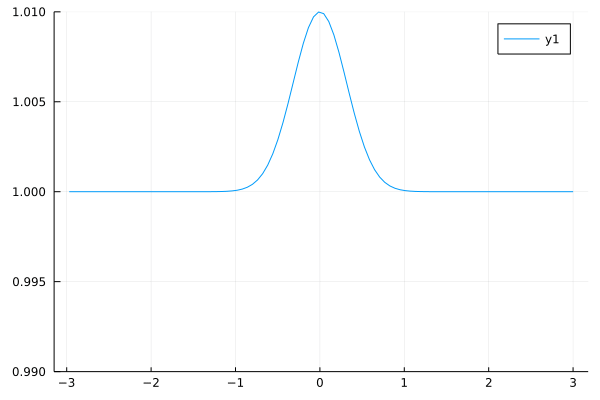

In [5]:
skip = Int(20)
anim = @animate for i in 1:skip:n_steps
    plot(xt, h_data[:, i])
    plot!(ylims = (1 - 0.01, 1 + 0.01))
end
 
gif(anim, "Staggered_Conservative.gif", fps = 8)